In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [128]:
train_meta = pd.read_csv('train/train_metadata.csv')
train_meta.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5488 non-null   int64 
 1   image_path  5488 non-null   object
 2   ClassId     5488 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 128.8+ KB


In [129]:
train_meta.head()


,id,image_path,ClassId
0,7218,img_000001.jpg,32
1,6333,img_000002.jpg,13
2,6867,img_000003.jpg,7
3,7730,img_000004.jpg,4
4,6338,img_000005.jpg,35


In [130]:
train_meta['image_id'] = train_meta['image_path'].str.slice(start=4, stop=10)
train_meta.head()


,id,image_path,ClassId,image_id
0,7218,img_000001.jpg,32,000001
1,6333,img_000002.jpg,13,000002
2,6867,img_000003.jpg,7,000003
3,7730,img_000004.jpg,4,000004
4,6338,img_000005.jpg,35,000005


In [131]:
from sklearn.model_selection import train_test_split

train_idx, dev_idx, train_label, dev_label = train_test_split(
    train_meta['image_id'],
    train_meta['ClassId'],
    test_size=0.2,
    random_state=42
)


In [132]:
ch_all = pd.read_csv('train/Features/color_histogram.csv')
ch_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  5488 non-null   object 
 1   ch_0        5488 non-null   float64
 2   ch_1        5488 non-null   float64
 3   ch_2        5488 non-null   float64
 4   ch_3        5488 non-null   float64
 5   ch_4        5488 non-null   float64
 6   ch_5        5488 non-null   float64
 7   ch_6        5488 non-null   float64
 8   ch_7        5488 non-null   float64
 9   ch_8        5488 non-null   float64
 10  ch_9        5488 non-null   float64
 11  ch_10       5488 non-null   float64
 12  ch_11       5488 non-null   float64
 13  ch_12       5488 non-null   float64
 14  ch_13       5488 non-null   float64
 15  ch_14       5488 non-null   float64
 16  ch_15       5488 non-null   float64
 17  ch_16       5488 non-null   float64
 18  ch_17       5488 non-null   float64
 19  ch_18       5488 non-null  

In [133]:

ch_all['image_id'] = ch_all['image_path'].str.slice(start=4, stop=10)


train_ch = ch_all.drop(columns=['image_path']).loc[ch_all['image_id'].isin(train_idx)]
dev_ch = ch_all.drop(columns=['image_path']).loc[ch_all['image_id'].isin(dev_idx)]




In [134]:
hog_all = pd.read_csv('train/Features/hog_pca.csv')
hog_all.info()
hog_all.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  5488 non-null   object 
 1   hog_pca_0   5488 non-null   float64
 2   hog_pca_1   5488 non-null   float64
 3   hog_pca_2   5488 non-null   float64
 4   hog_pca_3   5488 non-null   float64
 5   hog_pca_4   5488 non-null   float64
 6   hog_pca_5   5488 non-null   float64
 7   hog_pca_6   5488 non-null   float64
 8   hog_pca_7   5488 non-null   float64
 9   hog_pca_8   5488 non-null   float64
 10  hog_pca_9   5488 non-null   float64
 11  hog_pca_10  5488 non-null   float64
 12  hog_pca_11  5488 non-null   float64
 13  hog_pca_12  5488 non-null   float64
 14  hog_pca_13  5488 non-null   float64
 15  hog_pca_14  5488 non-null   float64
 16  hog_pca_15  5488 non-null   float64
 17  hog_pca_16  5488 non-null   float64
 18  hog_pca_17  5488 non-null   float64
 19  hog_pca_18  5488 non-null  

,image_path,hog_pca_0,hog_pca_1,hog_pca_2,hog_pca_3,hog_pca_4,hog_pca_5,hog_pca_6,hog_pca_7,hog_pca_8,...,hog_pca_10,hog_pca_11,hog_pca_12,hog_pca_13,hog_pca_14,hog_pca_15,hog_pca_16,hog_pca_17,hog_pca_18,hog_pca_19
0,img_000001.jpg,-0.763458,0.927880,0.264329,-0.638673,0.831455,-0.527469,-0.959387,-0.538355,1.262615,...,-0.439643,-1.485862,-0.892584,-0.455376,-0.979620,0.450825,-0.213796,-0.882416,-0.309656,0.271686
1,img_000002.jpg,1.049284,3.608200,-1.817190,0.904380,-0.282195,0.623239,-0.510430,-0.388628,-0.457727,...,-0.190342,0.210740,-0.011180,0.138000,0.101737,-0.335682,-0.886182,0.507969,0.006536,0.471807
2,img_000003.jpg,-1.552440,-0.432374,-0.318422,0.671877,-0.381869,-0.224374,0.565182,0.267907,0.144193,...,0.521769,0.328718,-0.357041,-0.192591,0.377116,0.501386,-0.421448,0.081289,0.730258,-0.205895
3,img_000004.jpg,-1.556871,0.214406,0.973758,0.613876,-0.657341,0.007032,0.140899,-0.159095,-0.187679,...,0.948256,-0.115478,0.146324,-0.296778,-0.595600,0.285638,-0.481589,-0.101580,-0.139084,0.586276
4,img_000005.jpg,-0.944294,-0.334833,0.415215,-0.607014,-1.004900,0.172754,-0.692467,-0.193404,1.385177,...,1.007779,-0.219087,0.420509,-0.053858,0.601939,-0.520063,0.062209,0.248771,0.140214,0.292198


In [135]:
hog_pca = hog_all.set_index('image_path')


In [136]:
hog_all['image_id'] = hog_all['image_path'].str.slice(start=4, stop=10)

train_hog = hog_all.drop(columns=['image_path']).loc[hog_all['image_id'].isin(train_idx)]
dev_hog = hog_all.drop(columns=['image_path']).loc[hog_all['image_id'].isin(dev_idx)]

train_hog.shape, dev_hog.shape


((4390, 21), (1098, 21))

In [137]:
additional_all = pd.read_csv(r'train/Features/additional_features.csv')
additional_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_path    5488 non-null   object 
 1   edge_density  5488 non-null   float64
 2   mean_b        5488 non-null   float64
 3   mean_g        5488 non-null   float64
 4   mean_r        5488 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.5+ KB


In [138]:
additional_all['image_id'] = additional_all['image_path'].str.slice(start=4, stop=10)

train_additional = additional_all.drop(columns=['image_path']).loc[additional_all['image_id'].isin(train_idx)]
dev_additional = additional_all.drop(columns=['image_path']).loc[additional_all['image_id'].isin(dev_idx)]

train_additional.shape, dev_additional.shape


((4390, 5), (1098, 5))

In [139]:
train_data = train_idx.to_frame().merge(
    train_additional, on=['image_id']
).merge(
    train_ch, on=['image_id']
).merge(
    train_hog, on=['image_id']
).set_index('image_id').sort_index()


In [140]:
dev_data = dev_idx.to_frame().merge(
    dev_additional, on=['image_id']
).merge(
    dev_ch, on=['image_id']
).merge(
    dev_hog, on=['image_id']
).set_index('image_id').sort_index()


In [141]:
train_data.shape, dev_data.shape


((4390, 120), (1098, 120))

In [142]:
y_train = train_label.set_axis(train_idx).sort_index()
y_dev = dev_label.set_axis(dev_idx).sort_index()

<Axes: xlabel='mean_r', ylabel='mean_g'>

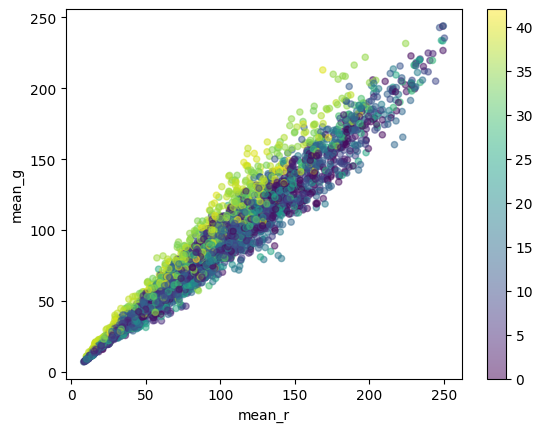

In [88]:
train_data.plot.scatter(
    x='mean_r',
    y='mean_g',
    c=y_train,
    cmap='viridis',
    alpha=0.5
)


### try some models

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, y_train)

print("Best RF Params:", grid.best_params_)
print("Best RF Dev Accuracy:", grid.score(dev_data, y_dev))

rf = grid.best_estimator_


Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF Dev Accuracy: 0.7969034608378871


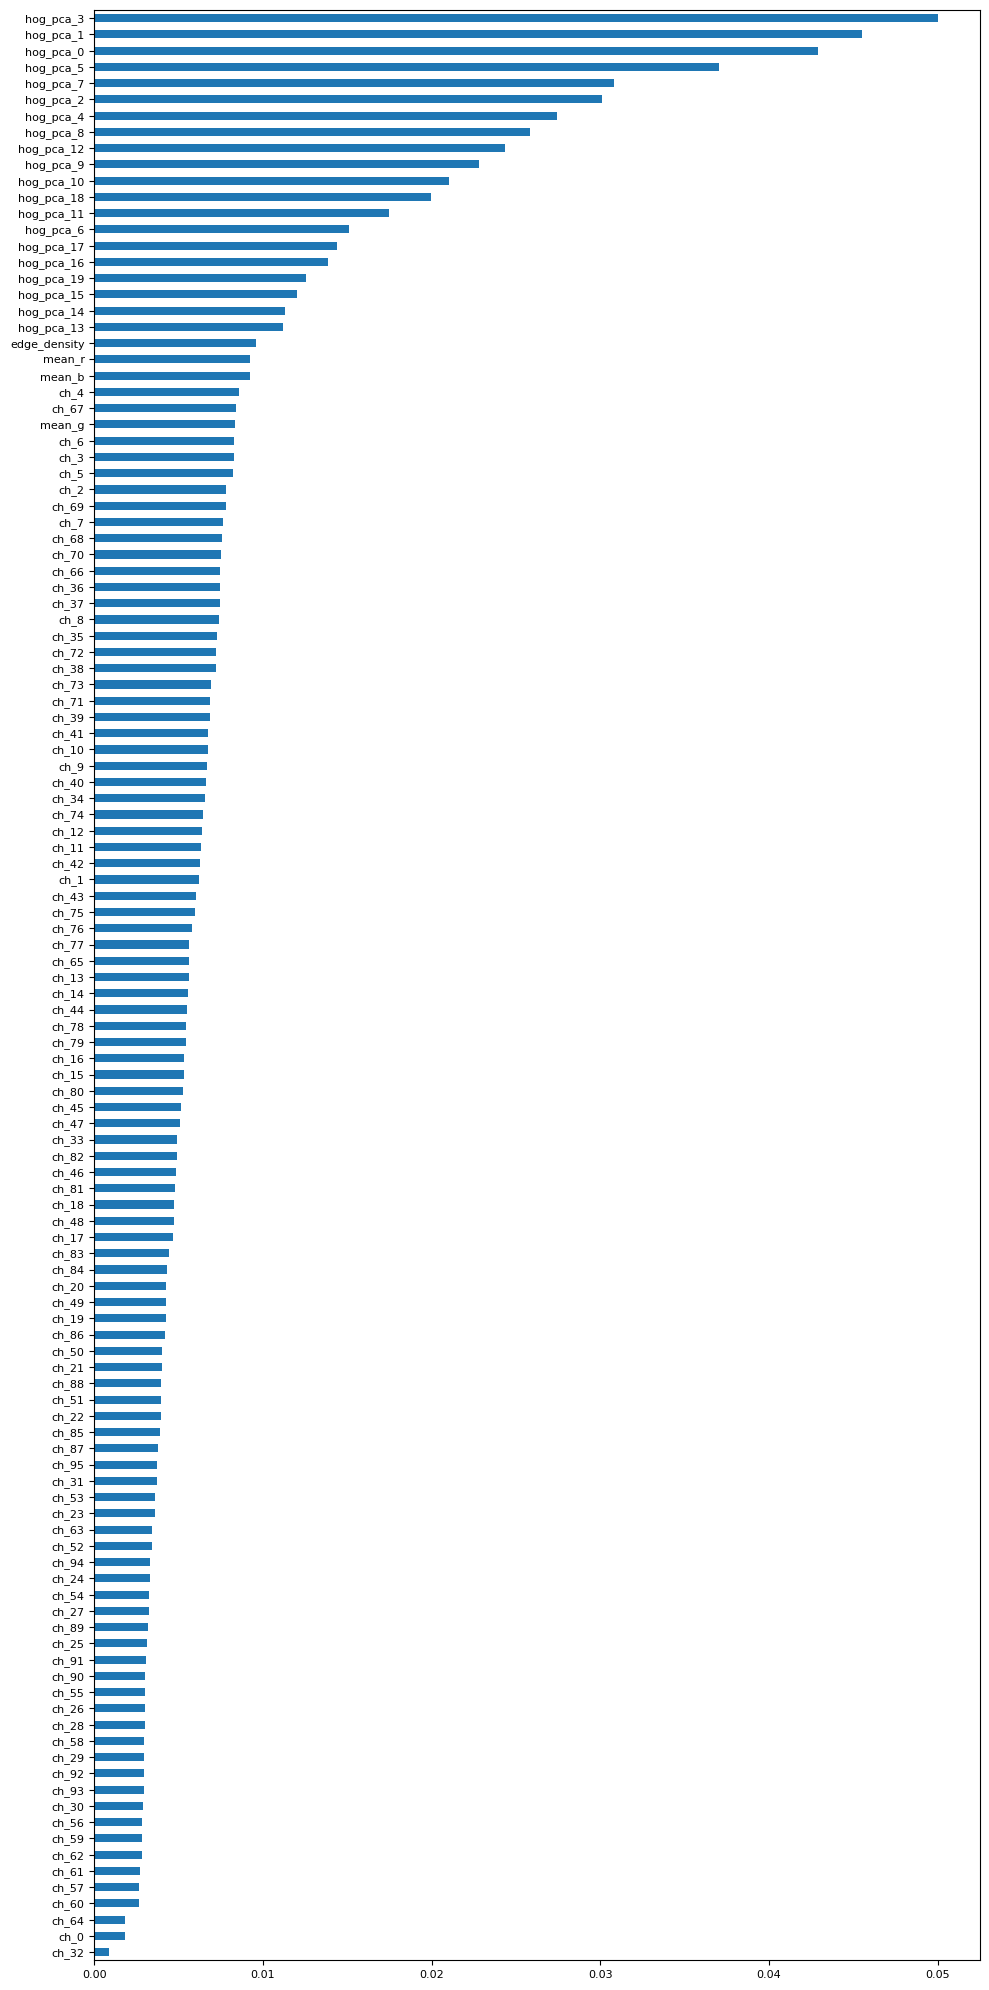

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 20))  # 放大画布
(
    pd.Series(rf.feature_importances_, index=train_data.columns)
    .sort_values()
    .plot.barh(fontsize=8)  # 设置字体大小
)
plt.tight_layout()
plt.show()


### Baseline：Random Forest

模型训练

In [145]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(train_data, y_train)

print("Train Accuracy:", rf.score(train_data, y_train))
print("Dev Accuracy:", rf.score(dev_data, y_dev))


Train Accuracy: 1.0
Dev Accuracy: 0.7905282331511839


分类报告 + F1 分数（按类）


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.72      0.88      0.79        58
           2       0.69      0.74      0.71        61
           3       0.71      0.68      0.69        37
           4       0.70      0.72      0.71        54
           5       0.69      0.69      0.69        52
           6       1.00      0.91      0.95        11
           7       0.83      0.71      0.77        42
           8       0.64      0.72      0.68        29
           9       0.73      0.80      0.77        41
          10       0.67      0.83      0.74        54
          11       0.53      0.70      0.60        37
          12       0.96      1.00      0.98        55
          13       1.00      1.00      1.00        60
          14       1.00      0.96      0.98        24
          15       1.00      0.50      0.67        18
          16       1.00      0.91      0.95        11
  

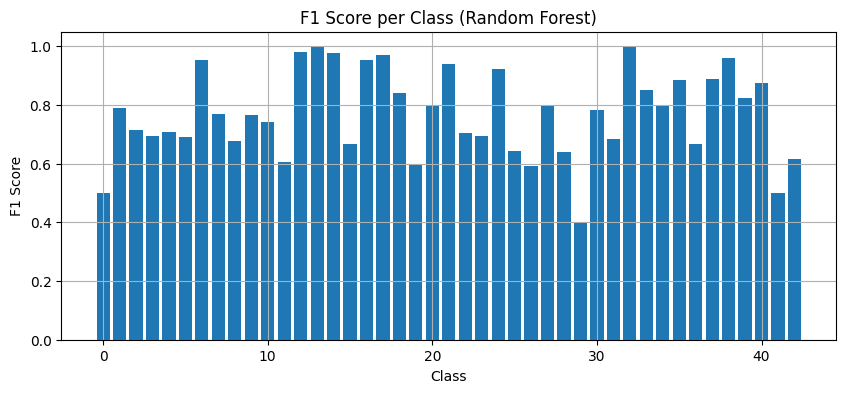

In [146]:
from sklearn.metrics import classification_report, f1_score

y_pred = rf.predict(dev_data)

print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred))

# F1-score per class
f1_per_class = f1_score(y_dev, y_pred, average=None)
plt.figure(figsize=(10, 4))
plt.bar(np.sort(y_dev.unique()), f1_per_class)
plt.title("F1 Score per Class (Random Forest)")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


In [147]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(train_data, y_train)

print("Train Accuracy:", rf.score(train_data, y_train))
print("Dev Accuracy:", rf.score(dev_data, y_dev))


Train Accuracy: 1.0
Dev Accuracy: 0.7905282331511839


特征重要性（排序+可视化）


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.72      0.88      0.79        58
           2       0.69      0.74      0.71        61
           3       0.71      0.68      0.69        37
           4       0.70      0.72      0.71        54
           5       0.69      0.69      0.69        52
           6       1.00      0.91      0.95        11
           7       0.83      0.71      0.77        42
           8       0.64      0.72      0.68        29
           9       0.73      0.80      0.77        41
          10       0.67      0.83      0.74        54
          11       0.53      0.70      0.60        37
          12       0.96      1.00      0.98        55
          13       1.00      1.00      1.00        60
          14       1.00      0.96      0.98        24
          15       1.00      0.50      0.67        18
          16       1.00      0.91      0.95        11
  

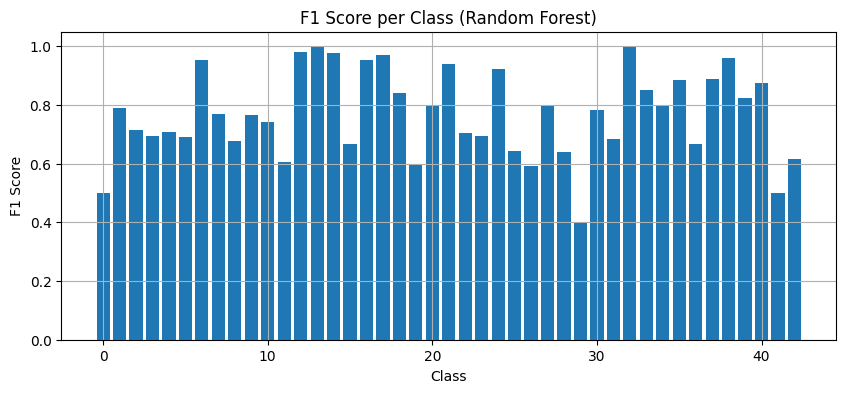

In [148]:
y_pred = rf.predict(dev_data)

print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred))

# F1-score per class
f1_per_class = f1_score(y_dev, y_pred, average=None)
plt.figure(figsize=(10, 4))
plt.bar(np.sort(y_dev.unique()), f1_per_class)
plt.title("F1 Score per Class (Random Forest)")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


错误分析（示例：分析真实为 4 的预测错样本）

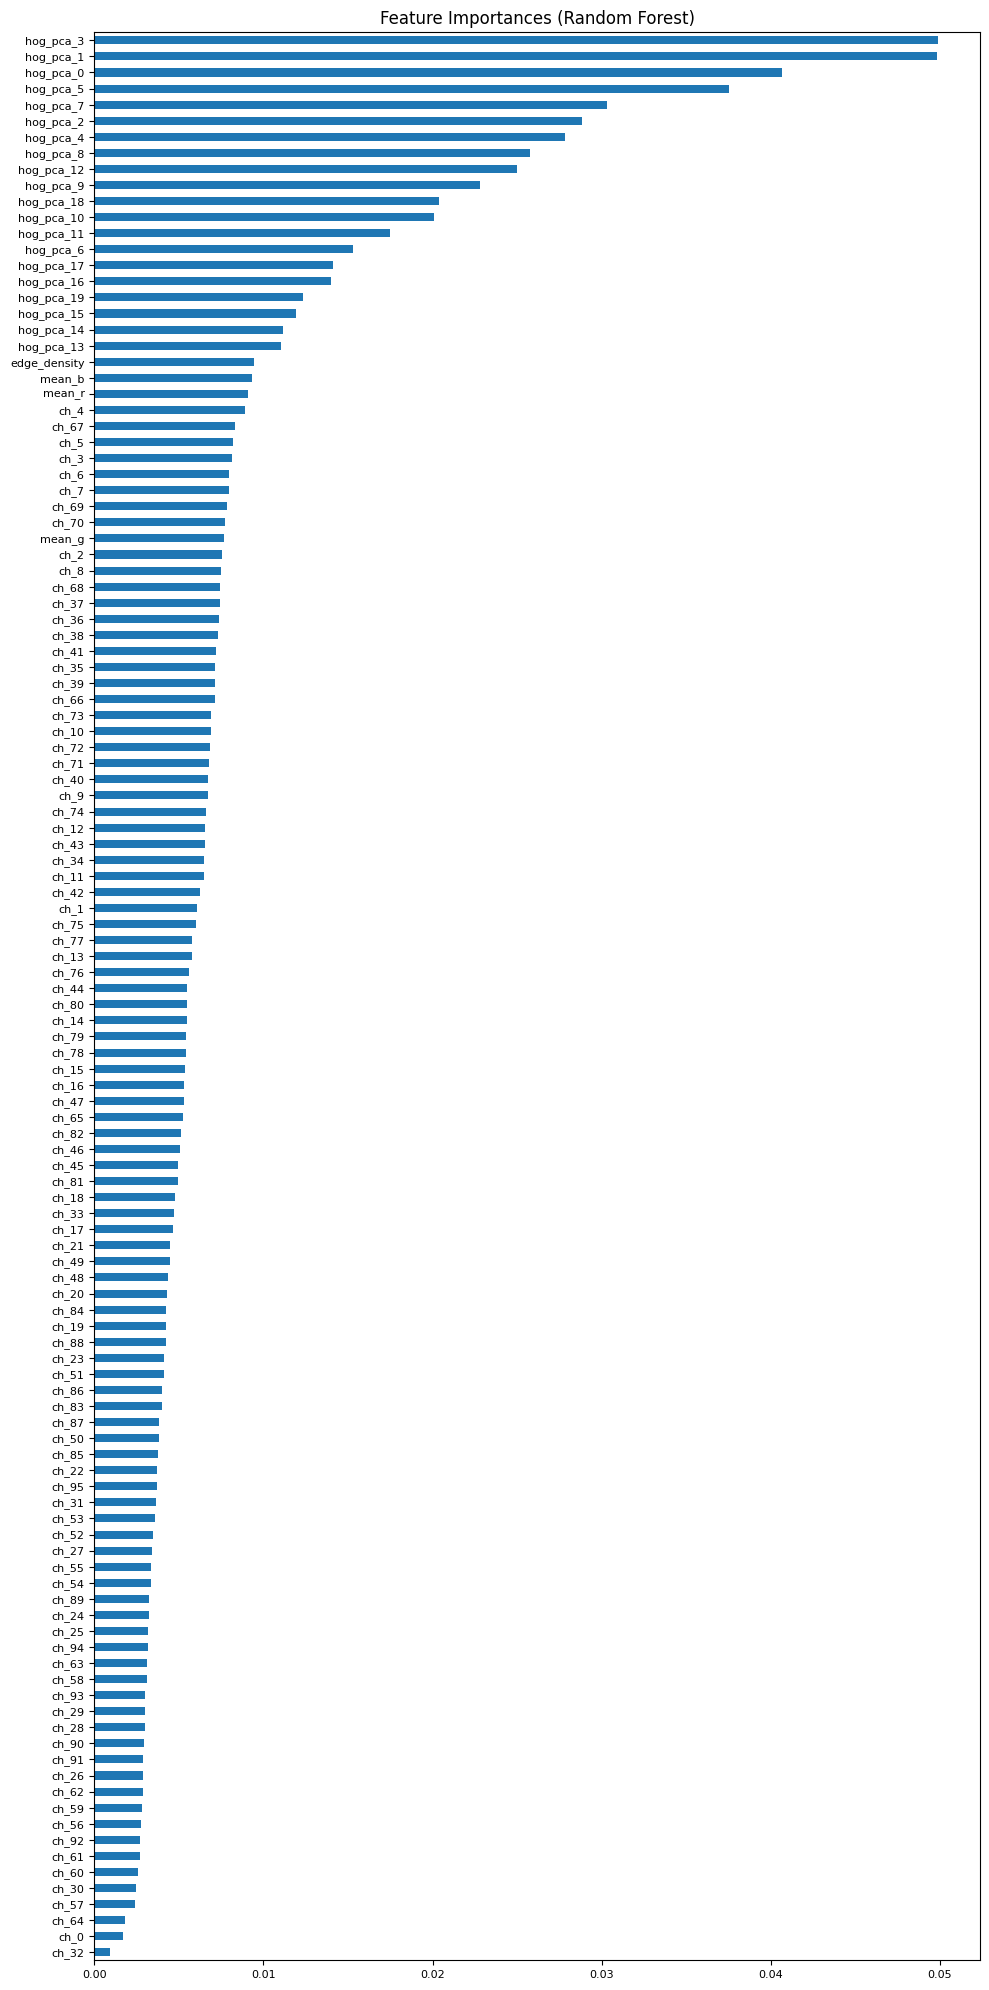

In [149]:
plt.figure(figsize=(10, 20))
pd.Series(rf.feature_importances_, index=train_data.columns)\
  .sort_values().plot.barh(fontsize=8)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


特征消融

In [150]:
rf_ablate = RandomForestClassifier(random_state=42)
rf_ablate.fit(train_data.drop(columns=['mean_r', 'mean_g', 'mean_b']), y_train)

print("Without RGB - Dev Accuracy:", rf_ablate.score(dev_data.drop(columns=['mean_r', 'mean_g', 'mean_b']), y_dev))


Without RGB - Dev Accuracy: 0.7905282331511839


合并数据集

In [151]:
# 加载测试集特征文件
hog_test = pd.read_csv('test/Features/hog_pca.csv')
ch_test = pd.read_csv('test/Features/color_histogram.csv')
additional_test = pd.read_csv('test/Features/additional_features.csv')


In [152]:
hog_test['image_id'] = hog_test['image_path'].str.slice(start=4, stop=10)
ch_test['image_id'] = ch_test['image_path'].str.slice(start=4, stop=10)
additional_test['image_id'] = additional_test['image_path'].str.slice(start=4, stop=10)


In [153]:
test_combined = hog_test.drop(columns=['image_path']) \
    .merge(ch_test.drop(columns=['image_path']), on='image_id') \
    .merge(additional_test.drop(columns=['image_path']), on='image_id') \
    .set_index('image_id').sort_index()


提交

In [154]:
# 强制 test_combined 使用训练时的列顺序
test_combined_aligned = test_combined[train_data.columns]


In [155]:
test_prediction_rf = rf.predict(test_combined_aligned)


In [156]:
test_metadata = pd.read_csv('test/test_metadata.csv')


In [157]:
submission_rf = pd.DataFrame({
    'id': test_metadata['id'],  # 正确顺序的 id
    'ClassId': test_prediction_rf
})
submission_rf.to_csv('submission_rf.csv', index=False)


### knn

In [158]:
from sklearn.neighbors import KNeighborsClassifier


In [159]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, y_train)

print("Best kNN Params:", grid.best_params_)
print("Best Dev Accuracy:", grid.score(dev_data, y_dev))

knn_best = grid.best_estimator_


Best kNN Params: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}
Best Dev Accuracy: 0.73224043715847


In [160]:
print("Train Accuracy:", knn_best.score(train_data, y_train))
print("Dev Accuracy:", knn_best.score(dev_data, y_dev))

Train Accuracy: 1.0
Dev Accuracy: 0.73224043715847


In [161]:
test_combined_aligned = test_combined[train_data.columns]

test_prediction_knn = knn_best.predict(test_combined_aligned)

submission_knn = pd.DataFrame({
    'id': test_metadata['id'],
    'ClassId': test_prediction_knn
})


submission_knn.to_csv('submission_knn_improve.csv', index=False)


### mlp

标准化

In [162]:
# 加载测试特征并提取 image_id（路径请根据你的结构修改）
hog_test = pd.read_csv("test/Features/hog_pca.csv")
ch_test = pd.read_csv("test/Features/color_histogram.csv")
additional_test = pd.read_csv("test/Features/additional_features.csv")

# 提取 image_id
for df in [hog_test, ch_test, additional_test]:
    df["image_id"] = df["image_path"].str.slice(start=4, stop=10)

# 合并测试特征
test_combined = hog_test.drop(columns=["image_path"]) \
    .merge(ch_test.drop(columns=["image_path"]), on="image_id") \
    .merge(additional_test.drop(columns=["image_path"]), on="image_id") \
    .set_index("image_id").sort_index()


In [163]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=200, early_stopping=True, random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(128,), (256, 128)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__learning_rate': ['adaptive'],
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, y_train)

print("Best MLP Params:", grid.best_params_)
print("Best Dev Accuracy:", grid.score(dev_data, y_dev))

mlp_best = grid.best_estimator_


/Users/xiaoyuqu/Downloads/COMP30027_2025_asst1_data/.conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xiaoyuqu/Downloads/COMP30027_2025_asst1_data/.conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xiaoyuqu/Downloads/COMP30027_2025_asst1_data/.conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xiaoyuqu/Downloads/COMP30027_2025_asst1_data/.conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic 

Best MLP Params: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (256, 128), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}
Best Dev Accuracy: 0.8278688524590164


In [164]:


print("Train Accuracy:", mlp_best.score(train_data, y_train))
print("Dev Accuracy:", mlp_best.score(dev_data, y_dev))


Train Accuracy: 0.9583143507972666
Dev Accuracy: 0.8278688524590164


In [165]:
test_combined_aligned = test_combined[train_data.columns]
test_prediction_mlp = mlp_best.predict(test_combined_aligned)

submission_mlp = pd.DataFrame({
    'id': test_metadata['id'],
    'ClassId': test_prediction_mlp
})

submission_mlp.to_csv("submission_mlp_improve.csv", index=False)


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_dev, mlp_best.predict(dev_data)))


              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.82      0.71      0.76        58
           2       0.69      0.75      0.72        61
           3       0.89      0.68      0.77        37
           4       0.71      0.85      0.77        54
           5       0.76      0.65      0.70        52
           6       0.85      1.00      0.92        11
           7       0.79      0.71      0.75        42
           8       0.59      0.79      0.68        29
           9       0.87      0.98      0.92        41
          10       0.90      0.85      0.88        54
          11       0.61      0.84      0.70        37
          12       1.00      0.98      0.99        55
          13       0.98      1.00      0.99        60
          14       0.92      1.00      0.96        24
          15       0.78      0.78      0.78        18
          16       0.92      1.00      0.96        11
          17       0.92    

### svm

In [171]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)
hog_pca = pca.fit_transform(train_hog.drop(columns=['image_id']))

hog_pca = pd.DataFrame(hog_pca, index=train_hog['image_id'])
hog_pca.columns = [f'hog_pca_{i}' for i in range(hog_pca.shape[1])]


In [172]:
hog_pca_dev = pca.transform(dev_hog.drop(columns=['image_id']))
hog_pca_dev = pd.DataFrame(hog_pca_dev, index=dev_hog['image_id'])
hog_pca_dev.columns = [f'hog_pca_{i}' for i in range(hog_pca_dev.shape[1])]


In [173]:
train_data = (
    train_idx.to_frame()
    .merge(train_ch, on='image_id')
    .merge(hog_pca, left_on='image_id', right_index=True)
    .set_index('image_id')
    .sort_index()
)

dev_data = (
    dev_idx.to_frame()
    .merge(dev_ch, on='image_id')
    .merge(hog_pca_dev, left_on='image_id', right_index=True)
    .set_index('image_id')
    .sort_index()
)


In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
dev_scaled = scaler.transform(dev_data)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm.fit(train_scaled, y_train)

print("Train Accuracy:", svm.score(train_scaled, y_train))
print("Dev Accuracy:", svm.score(dev_scaled, y_dev))


Train Accuracy: 0.8701594533029613
Dev Accuracy: 0.7577413479052824


In [175]:
test_scaled = scaler.transform(test_combined[train_data.columns])

test_prediction_svm = svm.predict(test_scaled)

submission_svm = pd.DataFrame({
    'id': test_combined.index,
    'ClassId': test_prediction_svm
})
submission_svm.to_csv("submission_svm_improve.csv", index=False)


In [176]:
test_combined = hog_test.drop(columns=['image_path']) \
    .merge(ch_test.drop(columns=['image_path']), on='image_id') \
    .merge(additional_test.drop(columns=['image_path']), on='image_id') \
    .set_index('image_id').sort_index()

test_scaled = scaler.transform(test_combined[train_data.columns])

test_prediction_svm = svm.predict(test_scaled)


In [177]:
submission_svm = pd.DataFrame({
    'id': test_metadata['id'],
    'ClassId': test_prediction_svm
})
submission_svm.to_csv('submission_svm.csv', index=False)
